# Project AI

Import required sources.

In [1]:
%pylab inline
import torch
from torchvision import datasets, transforms
from torch.autograd import Variable
from torch import nn, optim
from VAE import *
from train import *
import numpy as np

Populating the interactive namespace from numpy and matplotlib


## Run Gaussian model

In [2]:
# set hyperparameters
latent_dim = 2
batch_size = 20
epochs = 2

# Load data
train_data = datasets.MNIST('../data', train=True, download=True,
                   transform=transforms.ToTensor())

train_loader = torch.utils.data.DataLoader(train_data,
                                           batch_size=batch_size, shuffle=True, **{})

VAE_concrete, loss_concrete = run_train(latent_dim, epochs, 'Gumbel', train_loader)
VAE_Gaussian, loss_Gaussian = run_train(latent_dim, epochs, 'Gaussian', train_loader)
VAE_logit, loss_logit = run_train(latent_dim, epochs, 'logit', train_loader)

Train Epoch: 1 [0/60000 (0%)]	Loss: 549.123413
Train Epoch: 1 [2000/60000 (3%)]	Loss: 207.804047
Train Epoch: 1 [4000/60000 (7%)]	Loss: 179.714554
Train Epoch: 1 [6000/60000 (10%)]	Loss: 171.012039
Train Epoch: 1 [8000/60000 (13%)]	Loss: 194.595673
Train Epoch: 1 [10000/60000 (17%)]	Loss: 199.005295
Train Epoch: 1 [12000/60000 (20%)]	Loss: 193.298492
Train Epoch: 1 [14000/60000 (23%)]	Loss: 189.126831
Train Epoch: 1 [16000/60000 (27%)]	Loss: 176.540115
Train Epoch: 1 [18000/60000 (30%)]	Loss: 202.041672
Train Epoch: 1 [20000/60000 (33%)]	Loss: 191.671387
Train Epoch: 1 [22000/60000 (37%)]	Loss: 168.784637
Train Epoch: 1 [24000/60000 (40%)]	Loss: 184.811188
Train Epoch: 1 [26000/60000 (43%)]	Loss: 184.643707
Train Epoch: 1 [28000/60000 (47%)]	Loss: 181.761749
Train Epoch: 1 [30000/60000 (50%)]	Loss: 194.632950
Train Epoch: 1 [32000/60000 (53%)]	Loss: 201.046188
Train Epoch: 1 [34000/60000 (57%)]	Loss: 172.075943
Train Epoch: 1 [36000/60000 (60%)]	Loss: 183.083817
Train Epoch: 1 [38000/6

Train Epoch: 2 [12000/60000 (20%)]	Loss: 185.541870
Train Epoch: 2 [14000/60000 (23%)]	Loss: 184.231567
Train Epoch: 2 [16000/60000 (27%)]	Loss: 191.506012
Train Epoch: 2 [18000/60000 (30%)]	Loss: 190.278488
Train Epoch: 2 [20000/60000 (33%)]	Loss: 173.884003
Train Epoch: 2 [22000/60000 (37%)]	Loss: 169.882782
Train Epoch: 2 [24000/60000 (40%)]	Loss: 161.456177
Train Epoch: 2 [26000/60000 (43%)]	Loss: 182.185089
Train Epoch: 2 [28000/60000 (47%)]	Loss: 179.329819
Train Epoch: 2 [30000/60000 (50%)]	Loss: 173.452408
Train Epoch: 2 [32000/60000 (53%)]	Loss: 168.554169
Train Epoch: 2 [34000/60000 (57%)]	Loss: 179.431671
Train Epoch: 2 [36000/60000 (60%)]	Loss: 167.057129
Train Epoch: 2 [38000/60000 (63%)]	Loss: 179.514648
Train Epoch: 2 [40000/60000 (67%)]	Loss: 169.306503
Train Epoch: 2 [42000/60000 (70%)]	Loss: 157.906082
Train Epoch: 2 [44000/60000 (73%)]	Loss: 170.849380
Train Epoch: 2 [46000/60000 (77%)]	Loss: 173.412079
Train Epoch: 2 [48000/60000 (80%)]	Loss: 191.634979
Train Epoch:

## Plot of losses

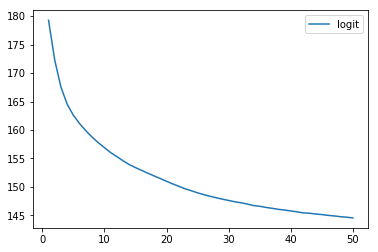

In [9]:
epoch_space = np.linspace(1,50,50)
# plt.plot(epoch_space, loss_Gaussian, label='Gaussian')
plt.plot(epoch_space, loss_logit, label='logit')
# plt.plot(epoch_space, loss_concrete, label='concrete')
plt.legend()
plt.show()

## 2-D scatterplot

In [10]:
def find_latent_coordinates(train_loader_scatter_plot, model):
    
    x_coordinates = defaultdict(lambda: [])
    y_coordinates = defaultdict(lambda: [])
    
    for batch_idx, (data, label) in enumerate(train_loader_scatter_plot):
        _, z, _, _ = model(data)
        index = label.data.cpu().numpy()[0]
        
        x_coordinates[index].append(z.data.cpu().numpy()[0][0])
        y_coordinates[index].append(z.data.cpu().numpy()[0][1])
        
        if batch_idx == 10000:
            break
            
    return x_coordinates, y_coordinates

In [11]:
import collections
from collections import *

# Reconstructed
train_data_scatter_plot = datasets.MNIST('../data', train=True, download=True,
                   transform=transforms.ToTensor())

train_loader_scatter_plot = torch.utils.data.DataLoader(train_data_scatter_plot,
                                           batch_size=1, shuffle=False, **{})

# x_latent_space_Gaussian, y_latent_space_Gaussian = find_latent_coordinates(train_loader_scatter_plot, VAE_Gaussian)
x_latent_space_logit, y_latent_space_logit = find_latent_coordinates(train_loader_scatter_plot, VAE_logit)



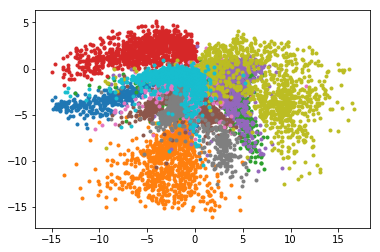

In [60]:
for label in x_latent_space_Gaussian:
    plt.scatter(x_latent_space_Gaussian[label], y_latent_space_Gaussian[label], marker='.')
plt.show()

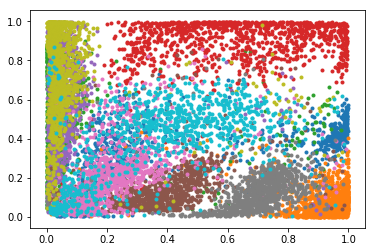

In [12]:
for label in x_latent_space_logit:
    plt.scatter(x_latent_space_logit[label], y_latent_space_logit[label], marker='.')
plt.show()

In [24]:
torch.Tensor([10])

tensor([ 10.])

## 2-D plot of models

In [ ]:
### Let's check if the reconstructions make sense
# Set model to test mode
VAE_MNIST.eval()
    
# Reconstructed
train_data_plot = datasets.MNIST('../data', train=True, download=True,
                   transform=transforms.ToTensor())

train_loader_plot = torch.utils.data.DataLoader(train_data_plot,
                                           batch_size=1, shuffle=False, **{})

for batch_idx, (data, _) in enumerate(train_loader_plot):
    x_hat, mu, logvar = VAE_MNIST(data)
    plt.imshow(x_hat.view(1,28,28).squeeze().data.numpy(), cmap='gray')
    plt.title('%i' % train_data.train_labels[batch_idx])
    plt.show()
    if batch_idx == 3:
        break